In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
from tqdm import tqdm

def load_data(file_path: str, label: str)->Tuple[np.ndarray, np.ndarray]:
    '''
    This function loads and parses text file separated by a ',' character and
    returns a data set as two arrays, an array of features, and an array of labels.
    Parameters
    ----------
    file_path : str
                path to the file containing the data set
    label : str
                A label of whether to grab training or testing data
    Returns
    -------
    features : ndarray
                2D array of shape (n,c) containing features for the data set
    labels : ndarray
                2D array of shape (n,d) containing labels for the data set
    '''
    D = np.genfromtxt(file_path, delimiter=",")
    if label == "train":
        features = D[0:800, :-3]  # all columns but the last three
        labels = D[0:800, -3:]  # the last 3 columns 
    else:
        features = D[801:1000, :-3]  # all columns but the last three
        labels = D[801:1000, -3:]  # the last 3 columns
    
    return features, labels

In [6]:
#Initialize helpful functions for math
def sigmoid(x: np.ndarray):
    return 1/(1+np.exp(-1*x))

def sigmoid_derivative(x: np.ndarray):
    return sigmoid(x)*(1-sigmoid(x))

def tanh(x: np.ndarray):
    return (np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))
    
def tanh_derivative(x:np.ndarray):
    return 1-np.square(tanh(x))

def softmax(x: np.ndarray):
    return np.exp(x)/np.sum(np.exp(x))

In [5]:
#initializes the weights of the network
def initialize_cell(input_size, hidden_size):

    cell = {}

    cell["W_i"] = np.random.normal(0,1,(input_size+hidden_size,hidden_size)) #input gate weights
    cell["W_f"] = np.random.normal(0,1,(input_size+hidden_size,hidden_size)) #forget gate weights
    cell["W_c"] = np.random.normal(0,1,(input_size+hidden_size,hidden_size)) #candidate gate weights
    cell["W_o"] = np.random.normal(0,1,(input_size+hidden_size,hidden_size)) #output gate weights
    cell["W_y"] = np.random.normal(0,1,(input_size+hidden_size,hidden_size)) #final gate weights

    cell["b_i"] = np.zeros(hidden_size,1) #input gate biases
    cell["b_f"] = np.zeros(hidden_size,1) #forget gate biases
    cell["b_c"] = np.zeros(hidden_size,1) #candidate gate biases
    cell["b_o"] = np.zeros(hidden_size,1) #output gate biases
    cell["b_y"] = np.zeros(hidden_size,1) #final gate biases

    return cell

In [7]:
# #forward pass of all gates
# def forward_pass(cell, input):

#     forward = {}

#     forward["forget"] = forward["cell_state"] * sigmoid((input.dot(cell["W_hf"]).dot(cell["activation"]) + cell["b_hf"]) + (input.dot(cell["W_f"]).dot(input) + cell["b_i"]))

#     forward["candidate"] = tanh((input.dot(cell["W_hc"]).dot(cell["activation"]) + cell["b_hc"]) + (input.dot(cell["W_c"]).dot(input) + cell["b_c"]))

#     forward["input"] = sigmoid((input.dot(cell["W_hi"]).dot(cell["activation"]) + cell["b_hi"]) + (input.dot(cell["W_i"]).dot(input) + cell["b_i"]))
#     forward["input"] = forward["input"] * forward["candidate"]

#     forward["output"] = sigmoid((input.dot(cell["W_ho"]).dot(cell["activation"]) + cell["b_ho"]) + (input.dot(cell["W_o"]).dot(input) + cell["b_o"]))

#     forward["cell_state"] = forward["forget"] + forward["input"]
#     forward["activation"] = forward["output"] * tanh(forward["cell_state"])

#     return forward

#forward pass of all gates
def forward_pass(cell, input):

    forward = {}

    Z = np.concatenate(cell["activation"], input)

    forward["forget"] = forward["cell_state"] * sigmoid(cell["W_f"].dot(Z) + cell["b_f"])

    forward["candidate"] = tanh(cell["W_c"].dot(Z) + cell["b_c"])

    forward["input"] = sigmoid(cell["W_i"].dot(Z) + cell["b_i"]) * forward["candidate"]

    forward["cell_state"] = forward["forget"] + forward["input"]

    forward["output"] = tanh(forward["cell_state"]) * sigmoid(cell["W_o"].dot(Z) + cell["b_o"]) 

    forward["activation"] = forward["output"] * tanh(forward["cell_state"])

    forward["final"] = softmax(forward["activation"].dot(cell["W_y"]) + cell["b_y"])

    return forward

In [38]:
def backpropagation(cell, forward):

    

    return 1

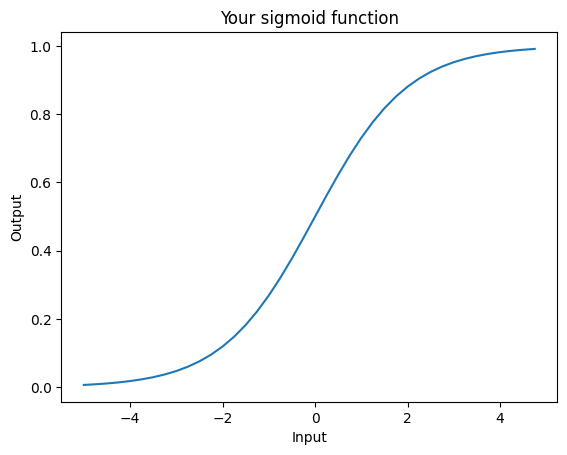

In [39]:
example_inputs = np.arange(-5,5,0.25)
your_output = sigmoid_forward(example_inputs)

plt.plot(example_inputs, your_output)
plt.title("Your sigmoid function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

3. After this you can put it together with your model to make your full *forward()* method, which will do a forward pass through your entire model (each layer, including the nonlinearities). It’s important to note that the final layer is not followed by a nonlinearity. You also must save every intermittent value in the cache (again for use later).

It is important to not only do the forward pass, but also cache the intermittent values so that we (well, *you* ) can do backpropogation next.

In [40]:
def forward(params: dict, X: np.ndarray):
    """
    This function will perform the forward pass of your backprop algorithm
    It will calculate your networks prediction using your parameters and
    will keep a cache of all intermittent values (which you need for backprop)
    ** YOU MUST COMPLETE THE "sigmoid_forward()" method for this part **
    Parameters
    ----------
    params : dict
        A dictionary that maps the labels: 'W0', 'W1', etc to their respective
        weight matrices -- this is the current state of your params
    X : np.ndarray
        A 2D numpy array representing input where each row represents a feature vector
    
    Returns
    ---------
    prediction : np.ndarray
        A 1D numpy array holding the predictions of your network given input X
    cache : dict
        A dictionary that holds all of the intermittent values calculated during your
        forward pass of your network (the 'OUT' and 'A'  of each layer), you must have the
        keys of this dictionary be of the form "AL" and "OUTL" where "AL" representes the input
        to the L-th layer of weights and "OUT(L+1)" is the output after multiplying by weights in Layer L . 
        
        X = OUT0 = A0
        XW0 + b0 = OUT1
        sigmoid(XW0 + b0) = A1
        sigmoid(XW0 + b0)W1 + b1 = OUT2
        ... 

        i.e "OUT0" will be the key for exactly the input X and "A0" will be (as a special case) also X  
        generally "AL" will be sigma("OUTL")
    """

    cache = {}

    cache["A0"] = np.copy(X)

    for i in range(1, len(params)//2):
        cache["OUT" + str(i)] = np.dot(cache["A" + str(i-1)], params["W" + str(i-1)]) + params["b" + str(i-1)]
        cache["A" + str(i)] = sigmoid_forward(cache["OUT" + str(i)])

    cache["OUT" + str(len(params)//2)] = np.dot(cache["A" + str(len(params)//2-1)], params["W" + str(len(params)//2-1)]) + params["b" + str(len(params)//2-1)]

    prediction = cache["OUT" + str(len(params)//2)]

    return prediction, cache

Use this code to check that your forward pass works:

In [41]:
x = np.random.rand(3, 5)

print()
print("Single layer Network ----------------------------")
print()

params = {"W0": np.ones((5,4)), "b0": np.zeros((4))}

your_pred, _ = forward(params, x)

print("your prediction:", your_pred[1:2])
print("correct prediction:", (x.dot(params["W0"]) + params["b0"])[1:2])

print()
print("Now larger Network ----------------------------")
print()

params["W1"] = np.ones((4,2))
params["b1"] = np.zeros((2))

your_pred, your_cache = forward(params, x)

print("your ouput size with larger net:", your_pred.shape, "-- Should be (3,2)" )
print("your Cache (check this looks right):")
for key in your_cache:
    print()
    print(key,":", your_cache[key])


Single layer Network ----------------------------

your prediction: [[3.47329479 3.47329479 3.47329479 3.47329479]]
correct prediction: [[3.47329479 3.47329479 3.47329479 3.47329479]]

Now larger Network ----------------------------

your ouput size with larger net: (3, 2) -- Should be (3,2)
your Cache (check this looks right):

A0 : [[0.80573763 0.79896571 0.74036695 0.5919434  0.75762073]
 [0.35511787 0.76911084 0.96929678 0.99445251 0.38531678]
 [0.30626958 0.42274283 0.35301689 0.27019025 0.31312242]]

OUT1 : [[3.69463443 3.69463443 3.69463443 3.69463443]
 [3.47329479 3.47329479 3.47329479 3.47329479]
 [1.66534197 1.66534197 1.66534197 1.66534197]]

A1 : [[0.97574632 0.97574632 0.97574632 0.97574632]
 [0.9699183  0.9699183  0.9699183  0.9699183 ]
 [0.8409538  0.8409538  0.8409538  0.8409538 ]]

OUT2 : [[3.90298529 3.90298529]
 [3.8796732  3.8796732 ]
 [3.36381519 3.36381519]]


4. Next we are going to start doing the hard part, derivatives! In this step though all you need to do is complete *sigma_backward()* which will calculate the derivative of sigma with respect to its input (whoa! like the math we did!). This method takes its output as an input – why on earth would it do that?? Check out your math! and if it still doesn’t make sense you should check your math.

In [42]:
def sigmoid_backward(A: np.ndarray):
    """
    calculates the derivative of your sigma function give the output of it
    Parameters
    ----------
    A: np.ndarray 
        sigmoid(OUT), this is the A value (output of the sigma) of 
        some layer. This is all we need to find dsigma / dOUT believe it or not
    Returns
    ----------
    dsigmoid: np.ndarray
        the derivative of sigmoid(OUT) dOUT -- this will use the A value
        it will also be very simple
    """

    dsigmoid = np.multiply(np.add(np.multiply(A,-1),1),A)

    return dsigmoid

yours: [0.     0.1875 0.25   0.1875 0.    ]
correct: [0, 0.1875, 0.25, 0.1875, 0]


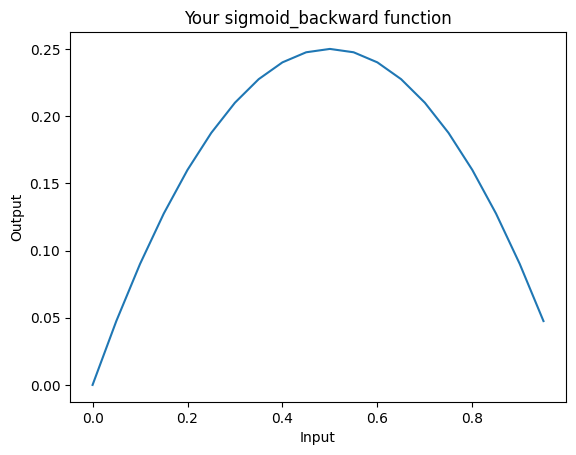

In [43]:
example_A = [1, 0.75, 0.5, 0.25, 0]
your_dsigmoid = sigmoid_backward(example_A)

print("yours:",your_dsigmoid)
print("correct:", [0, 0.1875, 0.25, 0.1875, 0])

example_inputs = np.arange(0,1,0.05)
your_output = sigmoid_backward(example_inputs)

plt.plot(example_inputs, your_output)
plt.title("Your sigmoid_backward function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


5. Well it’s later, time to use the cache! This next step is the heart of your entire homework so it may take a little bit. You are going to complete the *backprop_and_loss()* method which will take your network, your cache, and the true output and calculate the loss as well as the gradient of loss with respect to every parameter (i.e. each ”WL” and ”bL”) and store those gradients in a cache using the same naming convention. **Note:** this uses MEAN squared error

**HINT:** You'll need to loop over the layers (backwards) to calculate the intermediate derivatives and use them to calculate the next layer's derivatives. If you are able to do a single layer fully, you should be able to iteratively do it. 

In [44]:
def backprop_and_loss(params: dict, prediction: np.ndarray, cache: dict, Y : np.ndarray):
    """
    This function will calculate the loss (LSE) of your predictions and the gradient
    of your network for a single iteration. To calculate the gradient you must
    use backpropogation through your network
    ** YOU MUST COMPLETE THE "sigmoid_backward()" method for this part **
    Parameters
    ----------
    params : dict
        A dictionary that maps the labels: 'W0', 'W1', etc to their respective
        weight as well as 'b0', 'b1', etc to the bias
        -- this is the current state of your params
    prediction : np.ndarray
        A 1D numpy array holding the predictions of your network given input X
    cache : dict
        A dictionary that holds all of the intermittent values calculated during your
        forward pass of your network (the 'OUT' and 'A'  of each layer), you must have the
        keys of this dictionary be of the form "AL" and "INL" where "AL" representes the input
        to the L-th layer of weights and "OUT(L+1)" is the output after multiplying by weights in Layer L . 
        
        i.e "OUT0" will be the key for exactly the input X and "A0" will be (as a special case) also X 
        generally "AL" will be sigma("OUTL")
    Y : np.ndarray
        A 1D numpy array of the correct labels of our input X
    Returns
    ---------
    gradient : dict
        A dictionary that maps the labels: 'W0', 'W1', etc to the gradients of 
        the respective parameters (eg 'W0' -> gradient of first weight matrix)
    loss : float
        The MEAN (use np.mean) Squared Error loss given our predictions and true labels 'Y'. 
    
    """

    gradient = {}

    dout = 2*np.subtract(prediction, Y)

    for i in range(len(params)//2-1,-1,-1):
        gradient["W" + str(i)] = np.transpose(cache["A" + str(i)]).dot(dout)
        gradient["b" + str(i)] = dout.T.dot(np.ones(dout.shape[0]))

        dout = dout.dot(np.transpose(params["W" + str(i)])) * sigmoid_backward(cache["A" + str(i)])
        

    loss = np.mean(np.square(prediction - Y))

    return gradient, loss

Use this code to test your backprop and loss function, this test is not extensive though, you should try more network sizes using your math

In [45]:
x = np.random.rand(3, 5)*0.9

# print()
# print("Single layer Network ----------------------------")
# print()

params = {"W0": np.random.rand(5,1), "b0": np.random.rand(1)}

your_pred, your_cache = forward(params, x)
# print(your_cache)
y = np.random.rand(3,1) 

your_grad, your_loss = backprop_and_loss(params, your_pred, your_cache, y)

print("your grad for W0:", your_grad["W0"])
print("correct grad for W0:", x.T.dot(2*(your_pred-y)))

# print("your loss:", your_loss)
# print("correct loss:", np.mean((your_pred-y)**2) )

params = {"W0": np.random.randn(5,4), "b0": np.zeros((4))}

params["W1"] = np.random.randn(4,2)
params["b1"] = np.zeros((2))

your_pred, your_cache = forward(params, x)
# print(your_cache)
y = np.random.rand(your_pred.shape[0],your_pred.shape[1]) 

print()
print("Now larger Network ----------------------------")
print()

your_grad, your_loss = backprop_and_loss(params, your_pred, your_cache, y)

print("your grad for W0:", your_grad["W0"])
print("your grad for W1:", your_grad["W1"])
#print("correct grad for W0:", x.T.dot(2*(your_pred-y)))

# print("your loss:", your_loss)
# print("correct loss:", np.mean((your_pred-y)**2) )



your grad for W0: [[1.47722818]
 [1.94281755]
 [2.17819972]
 [1.05121284]
 [1.70709924]]
correct grad for W0: [[1.47722818]
 [1.94281755]
 [2.17819972]
 [1.05121284]
 [1.70709924]]

Now larger Network ----------------------------

your grad for W0: [[-0.12930419  0.25562847  0.21567078  0.02922955]
 [-0.13911388  0.27461218  0.22273239  0.01330716]
 [-0.21457969  0.3644739   0.33975462 -0.01429388]
 [-0.11344546  0.16208002  0.16929955 -0.04171324]
 [-0.14651745  0.24768843  0.22581611 -0.02222018]]
your grad for W1: [[-1.29491158 -0.75953234]
 [-5.10970175 -3.43050998]
 [-4.56368491 -2.75302084]
 [-0.83895712 -0.44106145]]


6. Now it’s time to actually do the learning! You must complete the *gradient_descent()* method which will call all of your other methods to find first the prediction, then the loss and gradient. It will then use them to do gradient descent on the entire parameter dictionary (using the corresponding gradients). You’re free to do this however you see fit (as long as it works!)

In [46]:
def gradient_descent(X : np.ndarray, Y : np.ndarray, initial_params : dict, lr : float, num_iterations : int)->Tuple[List[float], np.ndarray]:
    """
    This function runs gradient descent for a fixed number of iterations on the
    mean squared loss for a linear model parameterized by the weight vector w.
    This function returns a list of the losses for each iteration of gradient
    descent along with the final weight vector.
    Parameters
    ----------
    X : np.ndarray
        A 2D numpy array representing input where each row represents a feature vector
    Y : np.ndarray
        A 1D numpy array where each element represents a label for MSE
    initial_params : dictionary
        A dictionary holding the initialization of all parameters of the model as np.ndarrays
        (e.g. key 'W0' maps to the first weight array of the neural net) 
    lr : float
        The step-size parameter to use with gradient descent.
    num_iterations : int
        The number of iterations of gradient descent to run.
    Returns
    -------
    losses : list
        A list of floats representing the loss from each iteration and the
        loss of the final weight vector
    final_params : dictionary 
        A dictionary holding all of the parameters after training as np.ndarrays
        (this should have the same mapping as initial_params, just with updated arrays) 
    """

    losses = []
    final_params = {}

    for n in tqdm(range(num_iterations)):  #tqdm will create a loading bar for your loop
        
        prediction, cache = forward(initial_params, X)

        gradient, loss = backprop_and_loss(initial_params, prediction, cache, Y)

        losses.append(loss)

        for i in range(0,len(initial_params)//2):

            initial_params["W" + str(i)] -= lr*gradient["W" + str(i)]
            initial_params["b" + str(i)] -= lr*gradient["b"+ str(i)]
    
    return losses, initial_params

7. Now you can run it! And once you fix the 1000 bugs that you have... you can run it again and hopefully you see something *somewhat* like below – if you do, congrats! You (probably) have it working:


Run both of these blocks and see if your graph looks similar

In [47]:
def learning_curve(losses: list, names : list):
    """
    This function plots the learning curves for all gradient descent procedures in this homework.
    The plot is saved in the file learning_curve.png. No TODO here
    Parameters
    ----------
    losses : list
        A list of arrays representing the losses for the gradient at each iteration for each run of gradient descent
    names : list
        A list of strings representing the names for each gradient descent method
    Returns
    -------
    nothing
    """
    for loss in losses:
        plt.plot(loss)
    plt.xscale("log")
    plt.ylim(0, 10000)
    plt.xlabel("Iterations")
    plt.ylabel("Squared Loss")
    plt.title("Gradient Descent")
    plt.legend(names)
    plt.savefig("learning_curve.png")
    plt.show()


(800, 17)


  9%|▊         | 859/10000 [00:00<00:01, 8088.86it/s]

100%|██████████| 10000/10000 [00:02<00:00, 3578.61it/s]


final training loss values
single layer.........   161.5
two layer............   154.7
many layer...........   160.7


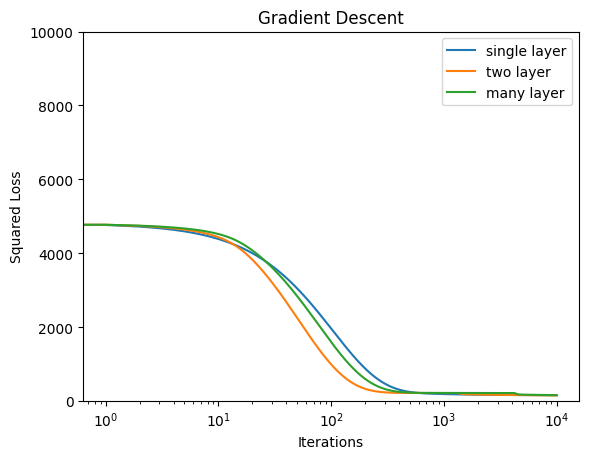

test loss of model 1: 105790.8732068747
test loss of model 2: 113569.83930553994
test loss of model 3: 124403.70111095396


100%|██████████| 10000/10000 [00:04<00:00, 2195.09it/s]

0.1011
test loss of your "best" model: 130367.64292079299


In [49]:
def train_networks():
    Train_X, Train_Y = load_data("StudentsPerformance.csv", "train")  # load the data set

    N = 10000 # N needs to equal 10,000 for your final plot. You can lower it to tune hyperparameters.
    print(Train_X.shape)

    init_params0 = initialize_network([17,3], scale=0.1) # initializes a sigle layer network (perceptron)
    losses0, final_params0 = gradient_descent(Train_X, Train_Y, init_params0, lr=1e-6, num_iterations=N)  

    init_params1 = initialize_network([17, 5, 3], scale=0.1)  # initializes a two layer network
    losses1, final_params1 = gradient_descent(Train_X, Train_Y, init_params1, lr=1e-6, num_iterations=N)  
   
    init_params2 = initialize_network([17, 7, 3, 3], scale=0.1)  # initializes a many layer network
    losses2, final_params2 = gradient_descent(Train_X, Train_Y, init_params2, lr=1e-6, num_iterations=N)   

    all_losses = [losses0, losses1, losses2]
    names = ["single layer", "two layer", "many layer"]
    print("final training loss values")
    for name, losses in zip(names, all_losses):
        print("{0:.<21}{1:>8.1f}".format(name, float(losses[-1])))

    learning_curve(all_losses, names)

    # TESTING 

    Test_X, Test_Y = load_data("StudentsPerformance.csv", "test")

    pred0, _ = forward(final_params0, Test_X)
    test_loss0 = np.sum(np.square(Test_Y  - pred0)) 
    print("test loss of model 1:", test_loss0)

    pred1, _ = forward(final_params1, Test_X)
    test_loss1 = np.sum(np.square(Test_Y  - pred1)) 
    print("test loss of model 2:", test_loss1)

    pred2, _ = forward(final_params2, Test_X)
    test_loss2 = np.sum(np.square(Test_Y  - pred2)) 
    print("test loss of model 3:", test_loss2)

    # TODO choose the hyper parameters for your best model (change them in train_best_model() )
    # You'll have to uncomment the below lines for once you find your best model

    best_losses, best_params = train_best_model(Train_X, Train_Y) 
    best_pred, _ = forward(best_params, Test_X)
    best_loss = np.sum(np.square(Test_Y - best_pred)) 
    print("test loss of your \"best\" model:", best_loss)


train_networks()

### 4a) That other bit you forgot about until now (10 points)
1. Use *train_best_model()* (you’ll need to find some good hyperparameters) and plot its training alongside the other 3 models (you’ll need to change code in main to plot this) and show it here – Describe your best model and list the values of its hyperparameters here. You should be able to do significantly better than the default, you will be checked for the code you used to find a best model and for the quality of your final loss.

In [48]:
def train_best_model(Train_X, Train_Y):
    """
    This function will train the model with the hyper parameters
    and layers that you have found to be best -- this model must get below 3
    MSE loss on our test data (which is not the test data you are given)
    """

    BEST_SCALE = 0.1011            # You need
    BEST_LAYERS = [17, 15, 3]          # to change
    BEST_ALPHA = 0.00001             # these
    BEST_NUM_ITERATIONS = 10000    # !


    best_params = initialize_network(BEST_LAYERS, BEST_SCALE)
    best_losses, best_final_params = gradient_descent(Train_X, Train_Y, best_params, lr=BEST_ALPHA, num_iterations=BEST_NUM_ITERATIONS)

    print(BEST_SCALE)
    return best_losses, best_final_params

Train_X, Train_Y = load_data("StudentsPerformance.csv", "train")  # load the data set  
best_losses,best_final_params = train_best_model(Train_X, Train_Y)

print("final loss:", best_losses[-1])     

  2%|▏         | 174/10000 [00:00<00:05, 1649.68it/s]

100%|██████████| 10000/10000 [00:04<00:00, 2109.62it/s]

0.1011
final loss: 133.28059750877068


2. Now note the printed test losses (the loss on the test set which isn’t trained on), for the 3 original models and your best, show the train loss and test loss. What is the relationship between these, explain why you think this is?

test loss of model 1: 105753.67332288889
test loss of model 2: 113589.8688507396
test loss of model 3: 121774.24686293973
test loss of your "best" model: 135425.31890427636

single layer.........   161.5
two layer............   154.8
many layer...........   164.2
final loss...........   132.2

The test loss seems inversely proportional to the train loss. 
This may be due to my best model overfitting, leading to poor generalization.

### 5) Time to Convert to PDF! (No Skipping this Step 🚀)

Hi! Congrats on finishing (or reading ahead)! We'll be using the google colab library to convert your notebook into a pdf, so you'll need to convert to colab if you're not using it (or finding another way to convert to a pdf):

📤 **Uploading to Colab from Your System? Here's How:**
1. Go to [colab](https://colab.research.google.com/).
2. Hit "upload" on the left sidebar of the pop-up box.
3. Upload the notebook.
4. It's alright if you've already run your code, the outputs of the cells should be brought over too.

🛣️ **Once you're on colab (or if you always were):**
1. First things first, click on File > Locate in Drive.
2. Next up, copy the path of the folder where your notebook resides in your Drive and paste it in variable named `DIR_FOR_COLAB_NOTEBOOK` in the cell below. (Usually, it's just 'Colab Notebooks/')
3. Next asisgn the variable named `NOTEBOOK_NAME` with the name of your notebook. Easy peasy!
4. Run the final cells
5. Double check the pdf has all of your code and outputs then slam that bad boy into gradescope.


In [33]:
DIR_FOR_COLAB_NOTEBOOK = 'Colab Notebooks/' #Please update it to the correct directory following the instruction
NOTEBOOK_NAME = 'HW2_notebook.ipynb' #Please update this to the name of the file you see on top right next to colab logo

In [34]:
import os
from google.colab import drive, files
import subprocess

assert DIR_FOR_COLAB_NOTEBOOK is not None, "Please update the variable DIR_FOR_COLAB_NOTEBOOK to the correct directory"
assert NOTEBOOK_NAME is not None, "Please update NOTEBOOK_NAME to correct notebook name"

print("\n#Mounting google drive\n")
drive.mount('/content/drive/')
notebook_dir = os.path.join('/content/drive/MyDrive', DIR_FOR_COLAB_NOTEBOOK)
os.chdir(notebook_dir)

print("\n#Installing Dependencies\n")
print("Installing nbconvert...", end="")
subprocess.run(f"pip install nbconvert", shell=True)
print("Done")
print("Installing texlive and dependancies...", end="")
subprocess.run(f"apt-get install texlive texlive-xetex texlive-latex-extra pandoc", shell=True)
print("Done")

print("\n#Converting to PDF\n")
print(f"Running the following command:\njupyter nbconvert --to pdf {NOTEBOOK_NAME} --output {NOTEBOOK_NAME.replace('.ipynb', '.pdf')}\n")
print("Started conversion...", end="")
result = subprocess.run(f"jupyter nbconvert --to pdf {NOTEBOOK_NAME} --output {NOTEBOOK_NAME.replace('.ipynb', '.pdf')}", shell=True, stderr=subprocess.PIPE)
print("Done")
print("\n##Output of conversion:\n")
print(result.stderr.decode())

print("\n#Downloading PDF file\n")
files.download(NOTEBOOK_NAME.replace('.ipynb', '.pdf'))

ModuleNotFoundError: No module named 'google'